# Wack a mole model creation

## Create data set

In [4]:
import cv2
import os

base_output_directory = 'dataset'
os.makedirs(base_output_directory, exist_ok=True)

video_directories_names = ['00-wack', '01-wack', '02-wack', '10-wack', '11-wack', '12-wack', 'nowack']


### Function for saving the frames from a video

In [7]:
def retrieve_frames(video_path, class_name, frame_count):
    cap = cv2.VideoCapture(video_path)

    while True:
        ret, frame = cap.read()
        
        if not ret:
            break

        output_directory = os.path.join(base_output_directory, class_name)
        os.makedirs(output_directory, exist_ok=True)
        frame_filename = os.path.join(output_directory, f'{class_name}-{frame_count:04d}.jpg')
        
        cv2.imwrite(frame_filename, frame)
        
        frame_count += 1
        
    cap.release()
    print(f'Extracted frames from {video_path}')
    
    return frame_count

### Going throug the videos 

In [8]:
video_directory = 'DatasetWackAMole'

frame_count_00 = 0
frame_count_01 = 0
frame_count_02 = 0
frame_count_10 = 0
frame_count_11 = 0
frame_count_12 = 0
frame_count_no = 0

for filename in os.listdir(video_directory):
    file_path = os.path.join(video_directory, filename)

    type = filename[:2]

    if type == '00':
        frame_count_00 = retrieve_frames(file_path, video_directories_names[0], frame_count_00) 
    elif type == '01':
        frame_count_01 = retrieve_frames(file_path, video_directories_names[1], frame_count_01)  
    elif type == '02':
        frame_count_02 = retrieve_frames(file_path, video_directories_names[2], frame_count_02) 
    elif type == '10':
        frame_count_10 = retrieve_frames(file_path, video_directories_names[3], frame_count_10) 
    elif type == '11':
        frame_count_11 = retrieve_frames(file_path, video_directories_names[4], frame_count_11) 
    elif type == '12':
        frame_count_12 = retrieve_frames(file_path, video_directories_names[5], frame_count_12) 
    elif type == 'no':
        frame_count_no = retrieve_frames(file_path, video_directories_names[6], frame_count_no)                       

Extracted frames from DatasetWackAMole\00wack1.mp4
Extracted frames from DatasetWackAMole\00wack2.mp4
Extracted frames from DatasetWackAMole\00wack3.mp4
Extracted frames from DatasetWackAMole\00wack4.mp4
Extracted frames from DatasetWackAMole\00wack5.mp4
Extracted frames from DatasetWackAMole\00wack6.mp4
Extracted frames from DatasetWackAMole\01wack1.mp4
Extracted frames from DatasetWackAMole\01wack2.mp4
Extracted frames from DatasetWackAMole\01wack3.mp4
Extracted frames from DatasetWackAMole\01wack4.mp4
Extracted frames from DatasetWackAMole\01wack5.mp4
Extracted frames from DatasetWackAMole\01wack6.mp4
Extracted frames from DatasetWackAMole\02wack1.mp4
Extracted frames from DatasetWackAMole\02wack2.mp4
Extracted frames from DatasetWackAMole\02wack3.mp4
Extracted frames from DatasetWackAMole\02wack4.mp4
Extracted frames from DatasetWackAMole\02wack5.mp4
Extracted frames from DatasetWackAMole\02wack6.mp4
Extracted frames from DatasetWackAMole\10wack1.mp4
Extracted frames from DatasetWa

### Filter the images 
Because of video it is possible that there are frames that are not correct for the label. 

#### Loading the model and define function for loading and processing image

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

model = tf.keras.models.load_model('whack_a_mole_model.h5', compile=False)


def load_and_preprocess_image(img_path, target_size=(160, 160)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array

#### Check the image functions

In [15]:
import shutil

confidence_threshold = 70

def check_image(file_path, label):
    print(f'checking for {file_path}')
    img_array = load_and_preprocess_image(file_path)
    prediction = model.predict(img_array).flatten()

    predicted_index = np.argmax(prediction)
    predicted_label = video_directories_names[predicted_index]
    confidence = prediction[predicted_index] * 100

    print(f"Predicted class: {predicted_label}")
    print(f"Model is {confidence:.2f}% sure about this prediction.")

    check_directory = os.path.join(os.path.dirname(file_path), 'check')

    if predicted_label != label or confidence < confidence_threshold:
        print(f"Predicted class: {predicted_label}")
        print(f"Model is {confidence:.2f}% sure about this prediction.")
        print(f"Moving {file_path} to check directory due to incorrect prediction or low confidence.")
        os.makedirs(check_directory, exist_ok=True)
        shutil.move(file_path, os.path.join(check_directory, os.path.basename(file_path)))


def check_images_of_directory(test_directory, label):
    for filename in os.listdir(test_directory):
        file_path = os.path.join(test_directory, filename)
        check_image(file_path, label)

##### Checking

In [16]:
check_images_of_directory('dataset/00-wack', video_directories_names[0])

checking for dataset/00-wack\00-wack-0000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class: 00-wack
Model is 99.56% sure about this prediction.
checking for dataset/00-wack\00-wack-0001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: 00-wack
Model is 99.58% sure about this prediction.
checking for dataset/00-wack\00-wack-0002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: 00-wack
Model is 99.63% sure about this prediction.
checking for dataset/00-wack\00-wack-0003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: 00-wack
Model is 99.43% sure about this prediction.
checking for dataset/00-wack\00-wack-0004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: 00-wack
Model is 99.51% sure about this prediction.
checking for dataset/00-wack\00-wack-0005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted class: 00-wack
Model is 99.50% sure about this prediction.
checking for dataset/00-wack\00-wack-0006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/ste

In [17]:
check_images_of_directory('dataset/01-wack', video_directories_names[1])
check_images_of_directory('dataset/02-wack', video_directories_names[2])
check_images_of_directory('dataset/10-wack', video_directories_names[3])
check_images_of_directory('dataset/11-wack', video_directories_names[4])
check_images_of_directory('dataset/12-wack', video_directories_names[5])
check_images_of_directory('dataset/nowack', video_directories_names[6])

checking for dataset/01-wack\01-wack-0000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: 00-wack
Model is 99.97% sure about this prediction.
Predicted class: 00-wack
Model is 99.97% sure about this prediction.
Moving dataset/01-wack\01-wack-0000.jpg to check directory due to incorrect prediction or low confidence.
checking for dataset/01-wack\01-wack-0001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: 00-wack
Model is 99.97% sure about this prediction.
Predicted class: 00-wack
Model is 99.97% sure about this prediction.
Moving dataset/01-wack\01-wack-0001.jpg to check directory due to incorrect prediction or low confidence.
checking for dataset/01-wack\01-wack-0002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: 00-wack
Model is 99.97% sure about this prediction.
Predicted class: 00-wack
Model is 99.97% sure about this prediction.
Moving dataset/01-wack\01-wack-0002.jpg to check directory due to incorrect prediction or low confidence.
checking for dat

## Sort and preprocess the dataset
The frame size is 160x160 pixels to use the pretrained model MobileNetV2. 

In [22]:
data = 'data'
os.makedirs(data, exist_ok=True)

# Train directory
train_dir = 'data/train'
os.makedirs(train_dir, exist_ok=True)

# Validation directory
val_dir = 'data/validation'
os.makedirs(val_dir, exist_ok=True)

# Test directory
test_dir = 'data/test'
os.makedirs(test_dir, exist_ok=True)

# Frame size
frame_size = (160, 160)

# Train, validation and test ratio
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15


### Sorting the images

In [23]:
import random

for video_dir in video_directories_names:

    # Input directory
    input_directory = 'dataset/' + video_dir

    # Shuffel the files 
    frame_files = os.listdir(input_directory)
    random.shuffle(frame_files)

    # Calculate the split indices
    train_split = int(len(frame_files) * train_ratio)
    val_split = int(len(frame_files) * (train_ratio + val_ratio))

    for i, frame_file in enumerate(frame_files):

        frame_path = os.path.join(input_directory, frame_file)
        frame = cv2.imread(frame_path)

        # Resize and normalize the frame
        resized_frame = cv2.resize(frame, frame_size)
        normalized_frame = resized_frame / 255.0
        normalized_frame_uint8 = (normalized_frame * 255).astype(np.uint8)

        # Determine the output directory based on the split
        if i < train_split:
            split_dir = train_dir
        elif i < val_split:
            split_dir = val_dir
        else:
            split_dir = test_dir

        output_dir = os.path.join(split_dir, video_dir)
        os.makedirs(output_dir, exist_ok=True)

        output_frame_path = os.path.join(output_dir, frame_file)
        cv2.imwrite(output_frame_path, normalized_frame_uint8)

    print(f"Directory {video_dir} is done")    


Directory 00-wack is done
Directory 01-wack is done
Directory 02-wack is done
Directory 10-wack is done
Directory 11-wack is done
Directory 12-wack is done
Directory nowack is done


## Training the model
### Loading and preparing the data

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = 'data/train'
val_dir = 'data/validation'
test_dir = 'data/test'

image_size = (160, 160) 
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation and test sets

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5972 images belonging to 7 classes.
Found 1280 images belonging to 7 classes.
Found 1284 images belonging to 7 classes.


### Setup pretrained model

In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')

base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

### Train the model

In [26]:
history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=val_generator
)

Epoch 1/10


C:\Users\laris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 178s 902ms/step - accuracy: 0.5835 - loss: 1.1209 - val_accuracy: 0.8594 - val_loss: 0.4081
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 607ms/step - accuracy: 0.8549 - loss: 0.4232 - val_accuracy: 0.9000 - val_loss: 0.2521
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 149s 787ms/step - accuracy: 0.9004 - loss: 0.2881 - val_accuracy: 0.9148 - val_loss: 0.2182
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 140s 741ms/step - accuracy: 0.9095 - loss: 0.2567 - val_accuracy: 0.9305 - val_loss: 0.1925
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 113s 592ms/step - accuracy: 0.9297 - loss: 0.2115 - val_accuracy: 0.8945 - val_loss: 0.2795
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 118s 614ms/step - accuracy: 0.9328 - loss: 0.1906 - val_accuracy: 0.9422 - val_loss: 0.1608
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 611ms/step - accuracy: 0.9367 - loss: 0.1842 - val_accuracy: 0.9312 - val_loss: 0.1642
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 113s 591ms/step - accuracy: 0.9474 - loss: 0.16

### Evaluate the model

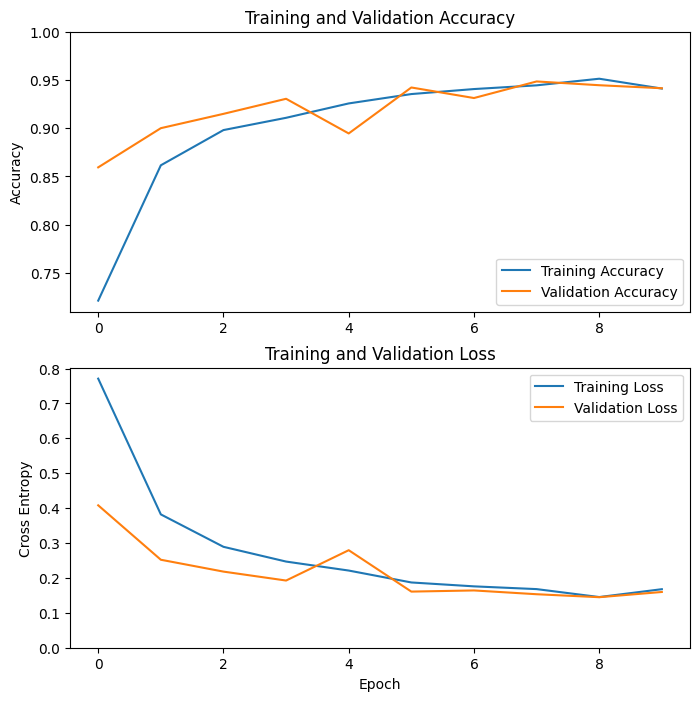

C:\Users\laris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 612ms/step - accuracy: 0.9388 - loss: 0.1525
Test Accuracy: 0.94


In [28]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the learning curves
plt.figure(figsize=(8, 8))

# Plotting training and validation accuracy
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(plt.ylim())])  # Adjust this based on your loss range
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


### Fine tune the model 

In [30]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs

fine_tune_history = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=len(history.epoch),
    validation_data=val_generator
)

Number of layers in the base model:  154


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 2,026,311 (7.73 MB)

 Non-trainable params: 396,544 (1.51 MB)

Epoch 11/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 190s 912ms/step - accuracy: 0.6242 - loss: 1.3236 - val_accuracy: 0.9359 - val_loss: 0.1755
Epoch 12/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.8333 - loss: 0.4719 - val_accuracy: 0.9258 - val_loss: 0.1964
Epoch 13/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8894 - loss: 0.3194 - val_accuracy: 0.9195 - val_loss: 0.2168
Epoch 14/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 189s 989ms/step - accuracy: 0.9271 - loss: 0.2176 - val_accuracy: 0.9195 - val_loss: 0.2293
Epoch 15/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.9346 - loss: 0.1879 - val_accuracy: 0.9164 - val_loss: 0.2316
Epoch 16/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9443 - loss: 0.1557 - val_accuracy: 0.9039 - val_loss: 0.2692
Epoch 17/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 135s 711ms/step - accuracy: 0.9497 - loss: 0.1419 - val_accuracy: 0.9305 - val_loss: 0.2113
Epoch 18/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 120s 635ms/step - accuracy: 0.9571 - los

### Evaluate fine tuned model

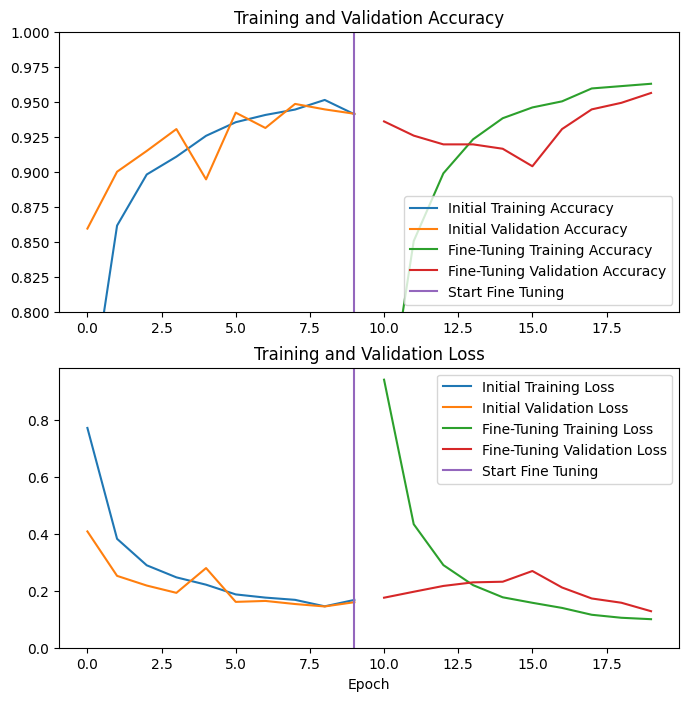

41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.9486 - loss: 0.1278
Test Accuracy: 0.95


In [32]:

# Extracting accuracy and loss from initial training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting accuracy and loss from fine-tuning history
acc_fine = fine_tune_history.history['accuracy']
val_acc_fine = fine_tune_history.history['val_accuracy']
loss_fine = fine_tune_history.history['loss']
val_loss_fine = fine_tune_history.history['val_loss']

# Combine initial training and fine-tuning data
total_acc = acc + acc_fine
total_val_acc = val_acc + val_acc_fine
total_loss = loss + loss_fine
total_val_loss = val_loss + val_loss_fine

initial_epochs = len(acc)

# Plotting the learning curves
plt.figure(figsize=(8, 8))

# Plotting training and validation accuracy
plt.subplot(2, 1, 1)
plt.plot(range(initial_epochs), acc, label='Initial Training Accuracy')
plt.plot(range(initial_epochs), val_acc, label='Initial Validation Accuracy')
plt.plot(range(initial_epochs, initial_epochs + len(acc_fine)), acc_fine, label='Fine-Tuning Training Accuracy')
plt.plot(range(initial_epochs, initial_epochs + len(val_acc_fine)), val_acc_fine, label='Fine-Tuning Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(2, 1, 2)
plt.plot(range(initial_epochs), loss, label='Initial Training Loss')
plt.plot(range(initial_epochs), val_loss, label='Initial Validation Loss')
plt.plot(range(initial_epochs, initial_epochs + len(loss_fine)), loss_fine, label='Fine-Tuning Training Loss')
plt.plot(range(initial_epochs, initial_epochs + len(val_loss_fine)), val_loss_fine, label='Fine-Tuning Validation Loss')
plt.ylim([0, max(plt.ylim())])  # Adjust this based on your loss range
plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

### Saving the model and history

In [35]:
import pickle

model.save('whack_a_mole_model.h5')
model.save('whack_a_mole_model.keras')

with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

### Visualize the model

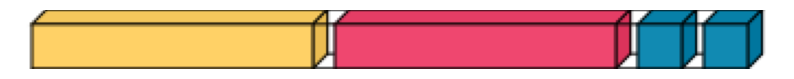

In [41]:
from tensorflow.keras.models import load_model
import visualkeras
from PIL import Image

model = load_model('whack_a_mole_model.keras')

visualkeras.layered_view(model).save('model_visualization.png')

img = Image.open('model_visualization.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


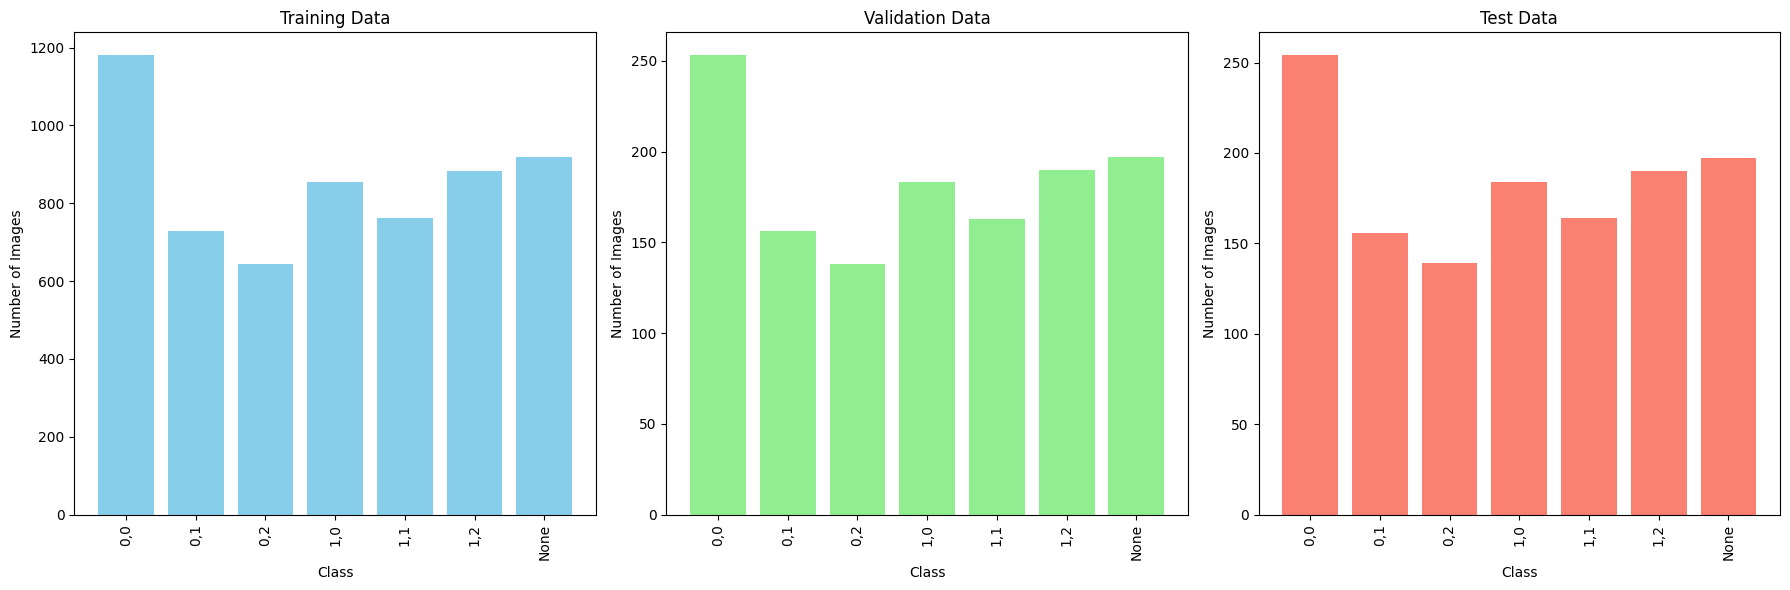

In [6]:
import os
import matplotlib.pyplot as plt

train_dir = 'data/train'
val_dir = 'data/validation'
test_dir = 'data/test'

class_name_mapping = {
    '00-wack': '0,0',  
    '01-wack': '0,1',  
    '02-wack': '0,2', 
    '10-wack': '1,0', 
    '11-wack': '1,1', 
    '12-wack': '1,2', 
    'nowack': 'None', 
}

colors = ['skyblue', 'lightgreen', 'salmon']

def get_image_count(data_dir, class_name_mapping):
    classes = os.listdir(data_dir)
    # Apply mapping to correct class names
    corrected_classes = [class_name_mapping.get(cls, cls) for cls in classes]
    # Count the number of images in each class
    image_count = {corrected_classes[i]: len(os.listdir(os.path.join(data_dir, classes[i]))) for i in range(len(classes))}
    return image_count


train_image_count = get_image_count(train_dir, class_name_mapping)
val_image_count = get_image_count(val_dir, class_name_mapping)
test_image_count = get_image_count(test_dir, class_name_mapping)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# Plot for Training data
axes[0].bar(train_image_count.keys(), train_image_count.values(), color=colors[0])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Number of Images')
axes[0].set_title('Training Data')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Validation data
axes[1].bar(val_image_count.keys(), val_image_count.values(), color=colors[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Number of Images')
axes[1].set_title('Validation Data')
axes[1].tick_params(axis='x', rotation=90)

# Plot for Test data
axes[2].bar(test_image_count.keys(), test_image_count.values(), color=colors[2])
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Number of Images')
axes[2].set_title('Test Data')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### New model

In [5]:
import tensorflow as tf

# Load the pre-trained MobileNetV2 model without the top layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.TimeDistributed(base_model, input_shape=(None, 160, 160, 3)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.GlobalAveragePooling2D()),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=5,           
    restore_best_weights=True  
)

# Train the model
model.fit(train_generator, validation_data=val_generator, epochs=50, callbacks=[early_stopping])

Epoch 1/50


ValueError: Exception encountered when calling TimeDistributed.call().

[1mInvalid input shape for input Tensor("sequential_1_1/time_distributed_4_1/strided_slice:0", shape=(None, 160, 3), dtype=float32). Expected shape (None, 160, 160, 3), but input has incompatible shape (None, 160, 3)[0m

Arguments received by TimeDistributed.call():
  • inputs=tf.Tensor(shape=(None, 160, 160, 3), dtype=float32)
  • training=True
  • mask=None